# Practical 03 -Train a 4 Layer Neural Network with Pima Dataset

## Introduction to Neural Network

#### A Neural Network (NN) in deep learning is a computational model inspired by the human brain, consisting of interconnected layers of neurons that process data. Each neuron receives input, applies a weight and bias, and passes the result through an activation function to produce an output. Neural networks are composed of an input layer, hidden layers, and an output layer. The model learns by adjusting weights through backpropagation and gradient descent to minimize error. Deep learning involves networks with many hidden layers, known as deep neural networks (DNNs), enabling them to model complex patterns in data for tasks like classification and prediction.

In [1]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/diabetes.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
x = df.iloc[:, :-1]  # All rows, all columns except the last one
y = df.iloc[:, -1]   # All rows, only the last column

In [5]:
from sklearn.model_selection import train_test_split

# Assuming x contains the features and y contains the labels
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
model = Sequential()

# Input layer with 12 neurons (assuming x_train has 8 features) and first hidden layer with 16 neurons
model.add(Dense(16, input_dim=x_train.shape[1], activation='relu'))

# Second hidden layer with 12 neurons
model.add(Dense(12, activation='relu'))

# Third hidden layer with 8 neurons
model.add(Dense(8, activation='relu'))

# Output layer with 1 neuron (for binary classification) and sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Step 2: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [7]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/100
62/62 [==============================] - 1s 6ms/step - loss: 4.0431 - accuracy: 0.4739 - val_loss: 1.2728 - val_accuracy: 0.5195
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.9823 - accuracy: 0.5293 - val_loss: 0.6715 - val_accuracy: 0.6429
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7333 - accuracy: 0.6042 - val_loss: 0.6694 - val_accuracy: 0.6234
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.6042 - val_loss: 0.6802 - val_accuracy: 0.6623
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6531 - val_loss: 0.6068 - val_accuracy: 0.6753
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.6498 - val_loss: 0.5944 - val_accuracy: 0.6883
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6547 - val_loss: 0.6192 - val_accuracy: 0.6558
Epoch 8/100
6

5/5 [==============================] - 0s 2ms/step
Accuracy of Neural Network: 74.03%


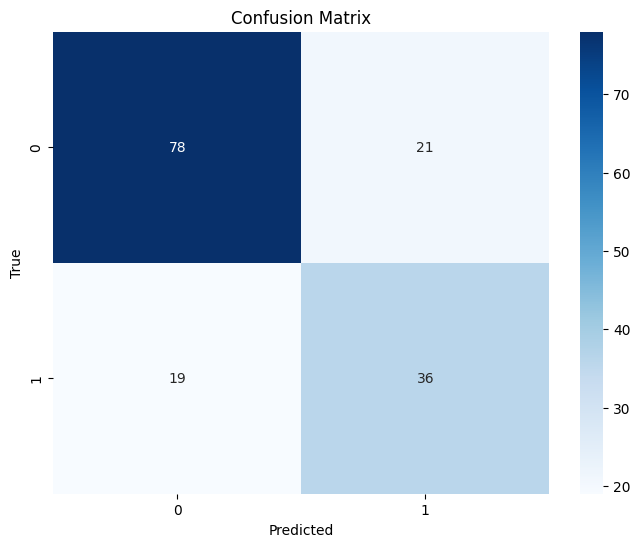

In [8]:
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Step 5: Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Neural Network: {accuracy * 100:.2f}%")

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()